In [3]:
import gdown

url = 'https://drive.google.com/uc?id=1FdydikIZfRaENz3CLaZT24Deyc4KvZO3'
gdown.download(url, output='advertising.zip', quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1FdydikIZfRaENz3CLaZT24Deyc4KvZO3
To: d:\AIO\AIO2024_Excerises\module04\advertising.zip
100%|██████████| 4.06k/4.06k [00:00<00:00, 6.22MB/s]


'advertising.zip'

## Prepare Data

In [16]:
# dataset
import numpy as np
import matplotlib.pyplot as plt
import random


def get_column(data, index):
    result = [row[index] for row in data]
    return result


def prepare_data(file_name_dataset):
    data = np.genfromtxt(
        file_name_dataset, delimiter=',', skip_header=1) . tolist()
    N = len(data)

    # get tv ( index =0)
    tv_data = get_column(data, 0)

    # get radio ( index =1)
    radio_data = get_column(data, 1)

    # get newspaper ( index =2)
    newspaper_data = get_column(data, 2)
    # get sales ( index =3)
    sales_data = get_column(data, 3)

    # building X input and y output for training
    X = [tv_data, radio_data, newspaper_data]
    y = sales_data
    return X, y

In [35]:
X, y = prepare_data('advertising.csv')
list = [sum(X[0][:5]), sum(X[1][:5]), sum(X[2][:5]), sum(y[:5])]
print(list)

[624.1, 175.10000000000002, 300.5, 78.9]


## Linear regression - one sample

In [18]:
def initialize_params():
    w1, w2, w3, b = (0.016992259082509283,
                     0.0070783670518262355, -0.002307860847821344, 0)
    return w1, w2, w3, b

In [19]:
def predict(x1, x2, x3, w1, w2, w3, b):
    result = x1*w1 + x2*w2 + x3*w3 + b
    return result

In [44]:
def update_weight_wi(wi, dl_dwi, lr):
    return wi - dl_dwi*lr


def update_weight_b(b, dl_db, lr):
    return b - dl_db*lr

## Loss MSE

In [25]:
def compute_loss(y_hat, y):
    loss = (y_hat - y)**2
    return loss

In [22]:
def compute_gradient_wi(xi, y, y_hat):
    return 2*xi*(y_hat - y)


def compute_gradient_b(y, y_hat):
    return 2*(y_hat - y)

In [26]:
def implement_linear_regression(X_data, y_data, epoch_max=50, lr=1e-5):
    losses = []

    w1, w2, w3, b = initialize_params()

    N = len(y_data)
    for epoch in range(epoch_max):
        for i in range(N):
            # get a sample
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]

            y = y_data[i]

            # compute output
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # compute loss
            loss = compute_loss(y, y_hat)

            # compute gradient w1 , w2 , w3 , b
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)

            # update parameters
            w1 = update_weight_wi(w1, dl_dw1, lr)
            w2 = update_weight_wi(w2, dl_dw2, lr)
            w3 = update_weight_wi(w3, dl_dw3, lr)
            b = update_weight_b(b, dl_db, lr)

            # logging
            losses.append(loss)
    return (w1, w2, w3, b, losses)

### Test

In [27]:
y = predict(x1=1, x2=1, x3=1, w1=0, w2=0.5, w3=0, b=0.5)
print(y)

1.0


In [28]:
l = compute_loss(y_hat=1, y=0.5)
print(l)

0.25


In [29]:
g_wi = compute_gradient_wi(xi=1.0, y=1.0, y_hat=0.5)
print(g_wi)

-1.0


In [30]:
g_b = compute_gradient_b(y=2.0, y_hat=0.5)
print(g_b)

-3.0


In [45]:
after_wi = update_weight_wi(wi=1.0, dl_dwi=-0.5, lr=1e-5)
print(after_wi)

1.000005


In [33]:
after_b = update_weight_b(b=0.5, dl_db=-1.0, lr=1e-5)
print(after_b)
print(after_wi)

0.50001
1.000005


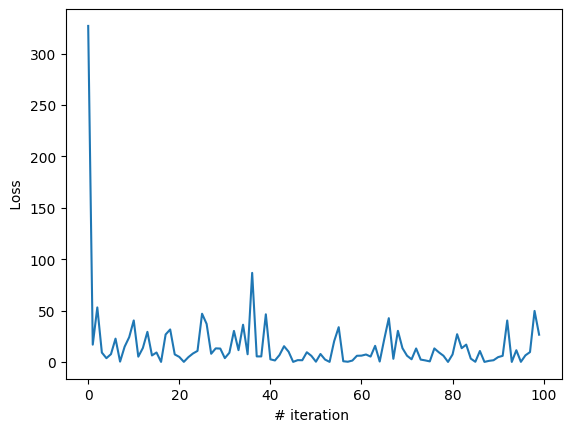

In [36]:
(w1, w2, w3, b, losses) = implement_linear_regression(X, y)
plt.plot(losses[:100])
plt.xlabel("# iteration ")
plt.ylabel(" Loss ")
plt.show()

In [37]:
X, y = prepare_data('advertising.csv')
(w1, w2, w3, b, losses) = implement_linear_regression(X, y)
print(w1, w2, w3)

0.07405984066396477 0.15917360263437663 0.017561197559948935


In [39]:
tv = 19.2
radio = 35.9
newspaper = 51.3
X, y = prepare_data('advertising.csv')
(w1, w2, w3, b, losses) = implement_linear_regression(X, y, epoch_max=50, lr=1e-5)
sales = predict(tv, radio, newspaper, w1, w2, w3, b)
print(f'predicted sales is {sales}')

predicted sales is 8.176413319549823


## Loss MAE

In [42]:
def compute_loss_mae(y_hat, y):
    return abs(y_hat - y)

In [43]:
l = compute_loss_mae(y_hat=1, y=0.5)
print(l)

0.5


In [46]:
def compute_gradient_wi_mae(xi, y_hat, y):
    if (y_hat > y):
        return xi
    elif (y_hat < y):
        return -xi
    return 0


def compute_gradient_b_mae(y_hat, y):
    if (y_hat > y):
        return 1
    elif (y_hat < y):
        return -1
    return 0

In [49]:
def implement_linear_regression_mae(X_data, y_data, epoch_max=50, lr=1e-5):
    losses = []

    w1, w2, w3, b = initialize_params()

    N = len(y_data)
    for epoch in range(epoch_max):
        for i in range(N):
            # get a sample
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]

            y = y_data[i]

            # compute output
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # compute loss
            loss = compute_loss_mae(y, y_hat)

            # compute gradient w1 , w2 , w3 , b
            dl_dw1 = compute_gradient_wi_mae(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi_mae(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi_mae(x3, y, y_hat)
            dl_db = compute_gradient_b_mae(y, y_hat)

            # update parameters
            w1 = update_weight_wi(w1, dl_dw1, lr)
            w2 = update_weight_wi(w2, dl_dw2, lr)
            w3 = update_weight_wi(w3, dl_dw3, lr)
            b = update_weight_b(b, dl_db, lr)

            # logging
            losses.append(loss)
    return (w1, w2, w3, b, losses)

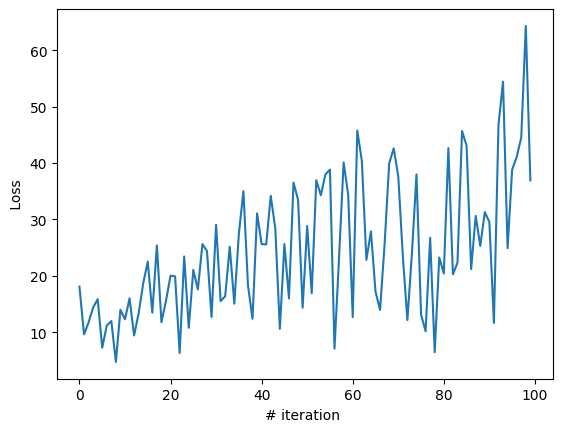

In [50]:
(w1, w2, w3, b, losses) = implement_linear_regression_mae(X, y)
plt.plot(losses[:100])
plt.xlabel("# iteration ")
plt.ylabel(" Loss ")
plt.show()

## Linear Regression - Batch N samples

In [53]:
def implement_linear_regression_nsamples(X_data, y_data, epoch_max=50, lr=1e-5):
    losses = []

    w1, w2, w3, b = initialize_params()
    N = len(y_data)

    for epoch in range(epoch_max):
        loss_total = 0.0
        dw1_total = 0.0
        dw2_total = 0.0
        dw3_total = 0.0
        db_total = 0.0
        for i in range(N):
            # get a sample
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]

            y = y_data[i]

            # compute output
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # compute loss
            loss = compute_loss(y, y_hat)
            loss_total += loss

            # compute gradient w1 , w2 , w3 , b
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)

            # accumulate gradient w1 , w2 , w3 , b
            dw1_total += dl_dw1
            dw2_total += dl_dw2
            dw3_total += dl_dw3
            db_total += dl_db

        # ( after processing N samples ) - update parameters
        w1 = w1 - lr*(dw1_total/N)
        w2 = w2 - lr*(dw2_total/N)
        w3 = w3 - lr*(dw3_total/N)
        b = b - lr*(db_total/N)

        # logging
        losses.append(loss_total / N)

    return (w1, w2, w3, b, losses)

[172.98395547828923, 39.4081674745134, 18.15746728564735, 14.634633779162357, 13.913880074022757, 13.640049637323427, 13.441395294810789, 13.259118517018994, 13.083802587178743, 12.913826664416215, 12.748804182322559, 12.58854742072041, 12.432904005847659, 12.281730988201284, 12.134890631437667, 11.992249630675893, 11.853678875589457, 11.719053303032835, 11.588251767260099, 11.461156916275085, 11.33765507239911, 11.217636116651946, 11.100993376782947, 10.987623518830576, 10.877426442098113, 10.77030517743778, 10.666165788738786, 10.564917277518694, 10.466471490519933, 10.370743030217112, 10.277649168143098, 10.187109760945372, 10.099047169086274, 10.013386178104167, 9.930053922354572, 9.848979811153313, 9.770095457245782, 9.69333460752933, 9.61863307595747, 9.545928678557278, 9.475161170493593, 9.406272185115144, 9.339205174920474, 9.273905354383018, 9.210319644576826, 9.148396619546123, 9.088086454363877, 9.029340874825948, 8.972113108729593, 8.916357838686066, 8.86203115641928, 8.809

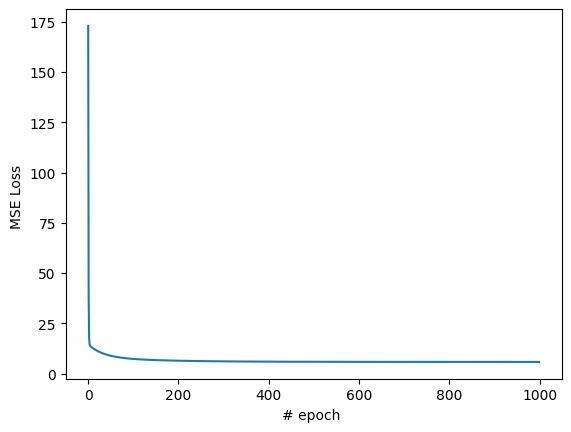

In [54]:
(w1, w2, w3, b, losses) = implement_linear_regression_nsamples(
    X, y, epoch_max=1000, lr=1e-5)
print(losses)
plt . plot(losses)
plt . xlabel("# epoch ")
plt . ylabel("MSE Loss ")
plt . show()

In [56]:
X, y = prepare_data('advertising.csv')
# using MSE loss
(w1, w2, w3, b, losses) = implement_linear_regression_nsamples(
    X, y, epoch_max=1000, lr=1e-5)

print(w1, w2, w3)

0.06710990754044266 0.15756173831487585 0.029619799386084403


## Reconfigure

In [67]:
def prepare_data(file_name_dataset):
    data = np.genfromtxt(file_name_dataset, delimiter=',',
                         skip_header=1).tolist()

    # get tv ( index =0)
    tv_data = get_column(data, 0)

    # get radio ( index =1)
    radio_data = get_column(data, 1)

    # get newspaper ( index =2)
    newspaper_data = get_column(data, 2)

    # get sales ( index =3)
    sales_data = get_column(data, 3)

    # building X input and y output for training
    # Create list of features for input
    X = [[1, x1, x2, x3]
         for x1, x2, x3 in zip(tv_data, radio_data, newspaper_data)]
    y = sales_data
    return X, y

In [58]:
def initialize_params():
    return [0, -0.01268850433497871, 0.004752496982185252, 0.0073796171538643845]

In [62]:
def predict(X_features, weights):
    result = np.dot(X_features, weights)
    return result

In [80]:
def compute_loss(y_hat, y):
    return (y_hat - y) ** 2


def compute_gradient_w(X_features, y, y_hat):
    dl_dweights = 2*np.array(X_features)*(y_hat - y)
    return dl_dweights


def update_weight(weights, dl_dweights, lr):
    weights = weights - lr*dl_dweights
    return weights

 epoch  0
 epoch  1
 epoch  2
 epoch  3
 epoch  4
 epoch  5
 epoch  6
 epoch  7
 epoch  8
 epoch  9
 epoch  10
 epoch  11
 epoch  12
 epoch  13
 epoch  14
 epoch  15
 epoch  16
 epoch  17
 epoch  18
 epoch  19
 epoch  20
 epoch  21
 epoch  22
 epoch  23
 epoch  24
 epoch  25
 epoch  26
 epoch  27
 epoch  28
 epoch  29
 epoch  30
 epoch  31
 epoch  32
 epoch  33
 epoch  34
 epoch  35
 epoch  36
 epoch  37
 epoch  38
 epoch  39
 epoch  40
 epoch  41
 epoch  42
 epoch  43
 epoch  44
 epoch  45
 epoch  46
 epoch  47
 epoch  48
 epoch  49


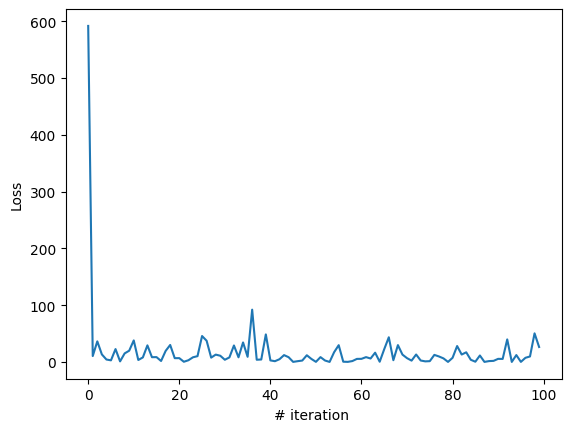

In [81]:
def implement_linear_regression(X_feature, y_ouput, epoch_max=50, lr=1e-5):

    losses = []
    weights = initialize_params()
    N = len(y_ouput)
    for epoch in range(epoch_max):
        print(" epoch ", epoch)
        for i in range(N):
            # get a sample - row i
            features_i = X_feature[i]
            y = y_ouput[i]

            # compute output
            y_hat = predict(features_i, weights)

            # compute loss
            loss = compute_loss(y, y_hat)

            # compute gradient w1 , w2 , w3 , b
            dl_dweights = compute_gradient_w(features_i, y, y_hat)

            # update parameters
            weights = update_weight(weights, dl_dweights, lr)

            # logging
            losses . append(loss)
    return weights, losses


X, y = prepare_data('advertising.csv')
W, L = implement_linear_regression(X, y)
plt.plot(L[0:100])
plt.xlabel("# iteration ")
plt.ylabel("Loss")
plt.show()

In [84]:
X, y = prepare_data('advertising.csv')
W, L = implement_linear_regression(X, y, epoch_max=50, lr=1e-5)
# Print loss value at iteration 9999
print(L[9999])

 epoch  0
 epoch  1
 epoch  2
 epoch  3
 epoch  4
 epoch  5
 epoch  6
 epoch  7
 epoch  8
 epoch  9
 epoch  10
 epoch  11
 epoch  12
 epoch  13
 epoch  14
 epoch  15
 epoch  16
 epoch  17
 epoch  18
 epoch  19
 epoch  20
 epoch  21
 epoch  22
 epoch  23
 epoch  24
 epoch  25
 epoch  26
 epoch  27
 epoch  28
 epoch  29
 epoch  30
 epoch  31
 epoch  32
 epoch  33
 epoch  34
 epoch  35
 epoch  36
 epoch  37
 epoch  38
 epoch  39
 epoch  40
 epoch  41
 epoch  42
 epoch  43
 epoch  44
 epoch  45
 epoch  46
 epoch  47
 epoch  48
 epoch  49
31.33922340810991
